In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
!wget = 'https://courses.openedu.ru/assets/courseware/v1/b89ef767ad5964b6a99cc0b2b65e33f8/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/alcedo-atthis-881594_1280.jpg'

--2024-01-21 13:03:47--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2024-01-21 13:03:47--  https://courses.openedu.ru/assets/courseware/v1/b89ef767ad5964b6a99cc0b2b65e33f8/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/alcedo-atthis-881594_1280.jpg
Resolving courses.openedu.ru (courses.openedu.ru)... 178.248.235.109
Connecting to courses.openedu.ru (courses.openedu.ru)|178.248.235.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113605 (111K) [image/jpeg]
Saving to: ‘alcedo-atthis-881594_1280.jpg’

alcedo-atthis-88159 100%[===================>] 110.94K   299KB/s    in 0.4s    

2024-01-21 13:03:49 (299 KB/s) - ‘alcedo-atthis-881594_1280.jpg’ saved [113605/113605]

FINISHED --2024-01-21 13:03:49--
Total wall clock time: 2.0s
Downloaded: 1 files, 111K in 0.4s (299 KB/s)


<function matplotlib.pyplot.show(close=None, block=None)>

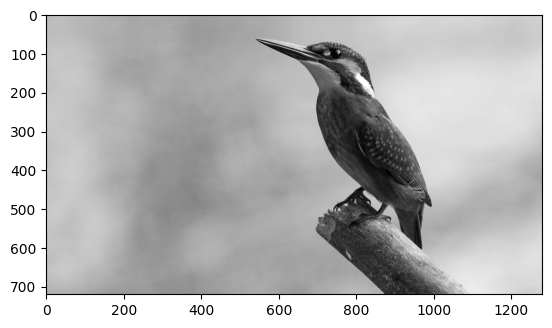

In [13]:
file_name = 'alcedo-atthis-881594_1280.jpg'
img = cv2.imread(file_name)
img_height, img_width, channels = img.shape
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.show

The component of the resulting transformation (-10788.797246223776-7447.699419603411j)
Minimum amplitude value: 9.43 Maximum amplitude value: 155667345.00
The difference between the maximum and the minimum: 16.52


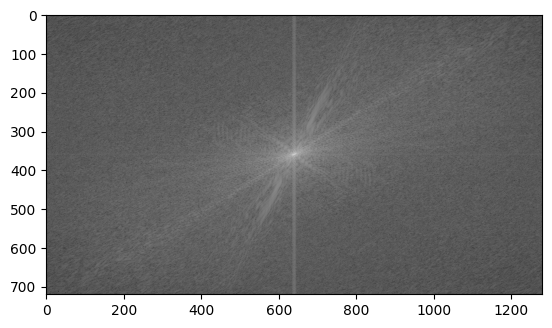

In [21]:
#A discrete Fourier transform
f = np.fft.fft2(gray_img)
print(f'The component of the resulting transformation {f[278][965]}')
#For ease of visualization, move the component corresponding to the zero frequency (f[0][0]) to the center
f_shift = np.fft.fftshift(f)
#All elements of the matrix were replaced with their amplitude modules
amplitude_f = np.abs(f_shift)
#The difference in amplitude values is very large
print(f'Minimum amplitude value: {np.min(amplitude_f):.2f} Maximum amplitude value: {np.max(amplitude_f):.2f}')
#Logarithmic scaling
amplitude_f = np.log(1 + np.abs(f_shift))
plt.imshow(amplitude_f, cmap='gray')
print(f'The difference between the maximum and the minimum: {np.max(amplitude_f) - np.min(amplitude_f):.2f}')

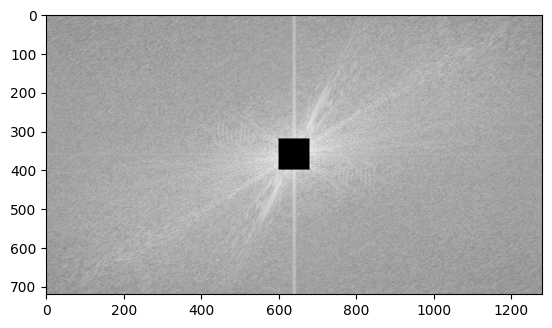

In [22]:
#We remove the main low frequencies and adjust their amplitude by assigning a value of 0 to all elements of the fshift matrix close to the center
#Low frequencies - smooth changes in pixel brightness
f_shift[int(img_height / 2) - 40 : int(img_height / 2) + 40, int(img_width / 2) - 40 : int(img_width / 2) + 40] = 0
amplitude_f = np.log(1 + np.abs(f_shift))
plt.imshow(amplitude_f, cmap='gray')

4.24


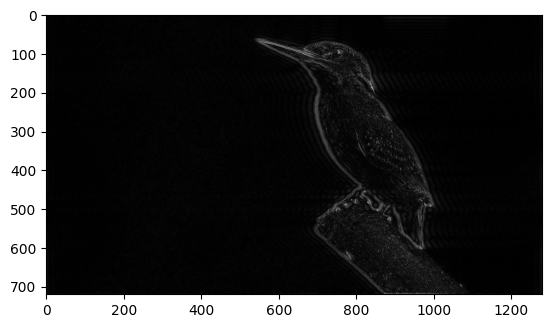

In [24]:
#Inverse fast Fourier transform
#The objects are segmented
f_ishift = np.fft.ifftshift(f_shift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.imshow(img_back, cmap='gray')
print(f'{img_back[669][397]:.2f}')

In [27]:
!wget = 'https://courses.openedu.ru/assets/courseware/v1/9bfaaba136f25b920e9d0d4317470c0f/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/giant-kingfisher-5623347_1280.jpg'

--2024-01-21 16:50:13--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2024-01-21 16:50:13--  https://courses.openedu.ru/assets/courseware/v1/9bfaaba136f25b920e9d0d4317470c0f/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/giant-kingfisher-5623347_1280.jpg
Resolving courses.openedu.ru (courses.openedu.ru)... 178.248.235.109
Connecting to courses.openedu.ru (courses.openedu.ru)|178.248.235.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 142479 (139K) [image/jpeg]
Saving to: ‘giant-kingfisher-5623347_1280.jpg.2’

giant-kingfisher-56 100%[===================>] 139.14K   326KB/s    in 0.4s    

2024-01-21 16:50:14 (326 KB/s) - ‘giant-kingfisher-5623347_1280.jpg.2’ saved [142479/142479]

FINISHED --2024-01-21 16:50:14--
Total wall clock time: 1.4s
Downloaded: 1 files, 139K in 0.4s (326 KB/s)


The sum of the intensities of all pixels across all three channels of the resulting image: 5475030


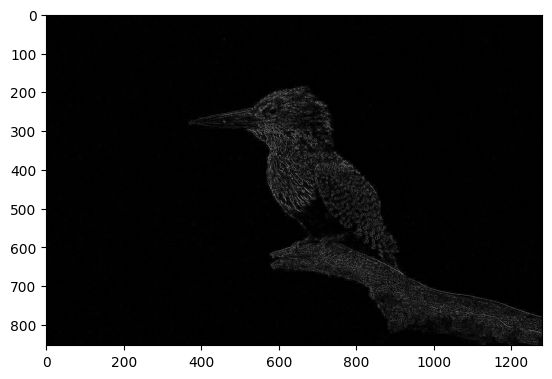

In [29]:
f_name = 'giant-kingfisher-5623347_1280.jpg'
img2 = cv2.imread(f_name)
RGB_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(RGB_img2, -1)
plt.imshow(laplacian, cmap = 'gray')

print(f'The sum of the intensities of all pixels across all three channels of the resulting image: {laplacian.sum()}')

(<Axes: >, <matplotlib.image.AxesImage at 0x7ec58ae70280>)

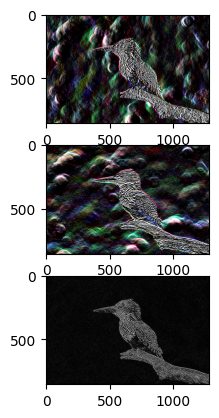

In [6]:
sobel_x = cv2.Sobel(img2, -1, 1, 0, ksize=5)
sobel_y = cv2.Sobel(img2, -1, 0, 1, ksize=5)
sobel_full = cv2.Sobel(img2, -1, 1, 1, ksize=5)
plt.subplot(3,1,1), plt.imshow(sobel_x, cmap='gray')
plt.subplot(3,1,2), plt.imshow(sobel_y, cmap='gray')
plt.subplot(3,1,3), plt.imshow(sobel_full, cmap='gray')

The sum of the intensities of all pixels in the resulting image: 9937095


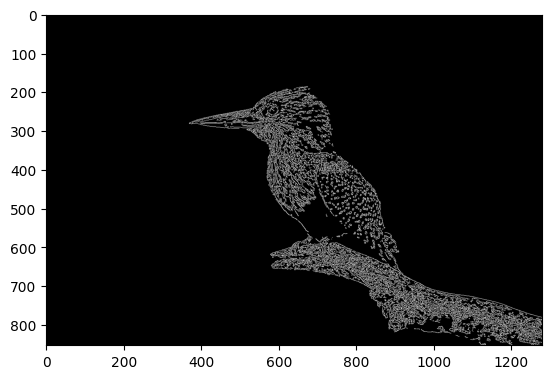

In [30]:
canny = cv2.Canny(RGB_img2, 100, 200)
plt.imshow(canny, cmap='gray')
print(f'The sum of the intensities of all pixels in the resulting image: {canny.sum()}')